In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de Datos

In [9]:
datos = pd.read_csv('winequality-red-Tarea-final.csv')
datos['calidad']=pd.Categorical(datos['quality'].apply(lambda x: 1 if x>5 else 0), categories=[0,1])
datos.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,calidad
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


# Primera Parte

## Histograma

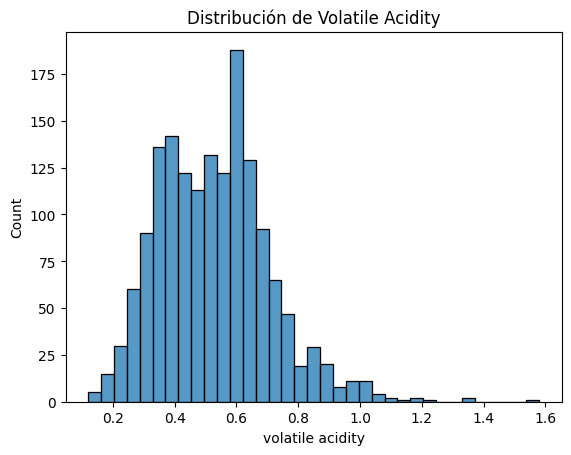

In [10]:
fig, ax = plt.subplots()
sns.histplot(data=datos, x='volatile acidity', ax=ax)
ax.set_title('Distribución de Volatile Acidity')
plt.show()

## Gráfico de burbuja

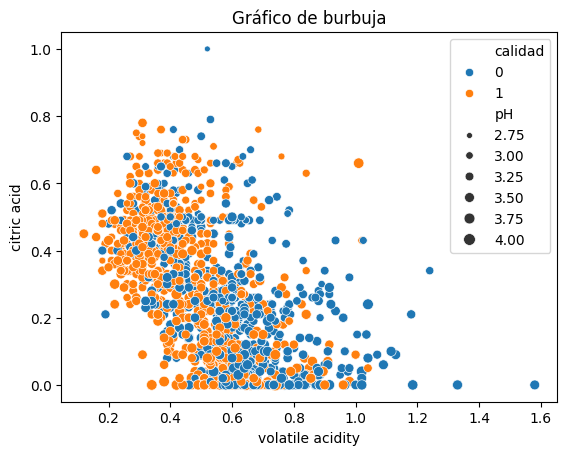

In [14]:
fig, ax = plt.subplots()
sns.scatterplot(data=datos, x='volatile acidity', y = 'citric acid', size='pH', hue='calidad', ax=ax)
ax.set_title('Gráfico de burbuja')
plt.show()

## Gráfico de dispersión

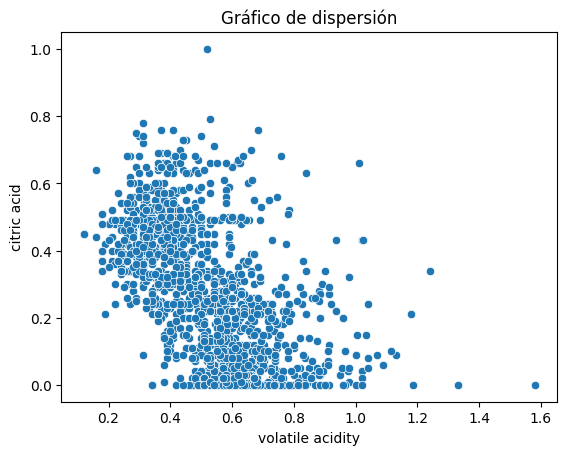

In [15]:
fig, ax = plt.subplots()
sns.scatterplot(data=datos, x='volatile acidity', y = 'citric acid', ax=ax)
ax.set_title('Gráfico de dispersión')
plt.show()

## Matriz de Gráficos

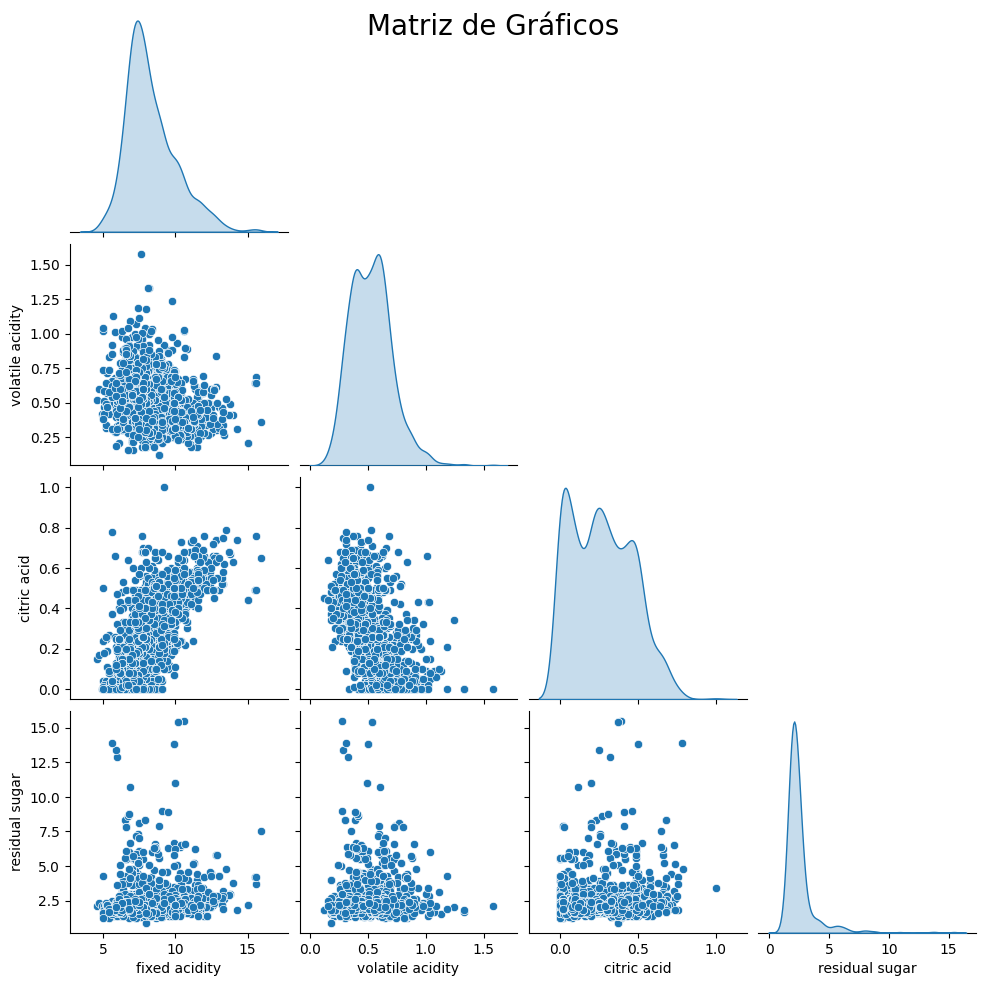

In [23]:
g=sns.pairplot(data=datos[['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar']], diag_kind='kde', markers='o', corner=True)
g.fig.suptitle("Matriz de Gráficos",size=20)
plt.show()

## Gráfico de densidad

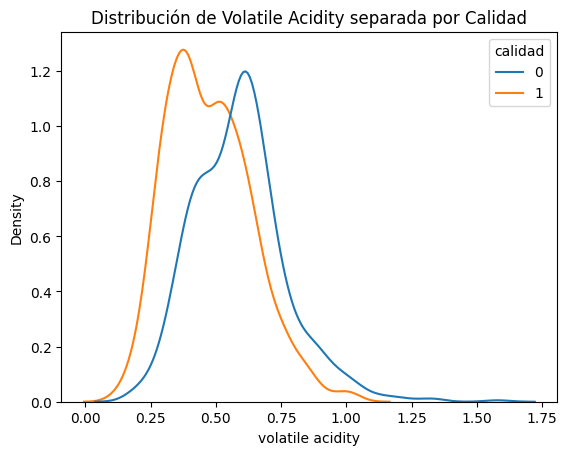

In [27]:
fig, ax = plt.subplots()
sns.kdeplot(data=datos, x='volatile acidity', hue='calidad', ax=ax)
ax.set_title('Distribución de Volatile Acidity separada por Calidad')
plt.show()

## Gráfico de torta

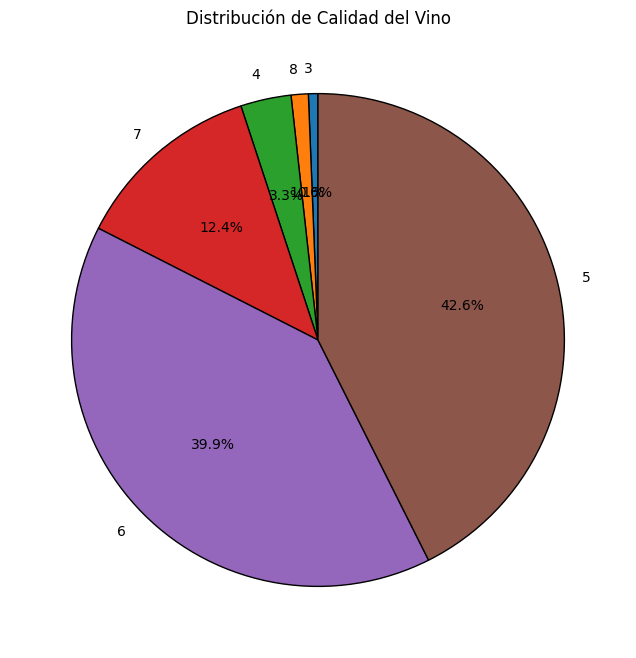

In [32]:

df = datos.groupby('quality')['calidad'].count().reset_index()
df.columns = ['quality', 'count']
df = df.sort_values(by='count')
plt.figure(figsize=(8, 8))
plt.pie(df['count'], labels=df['quality'], autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title("Distribución de Calidad del Vino")
plt.show()

## Small Multiples

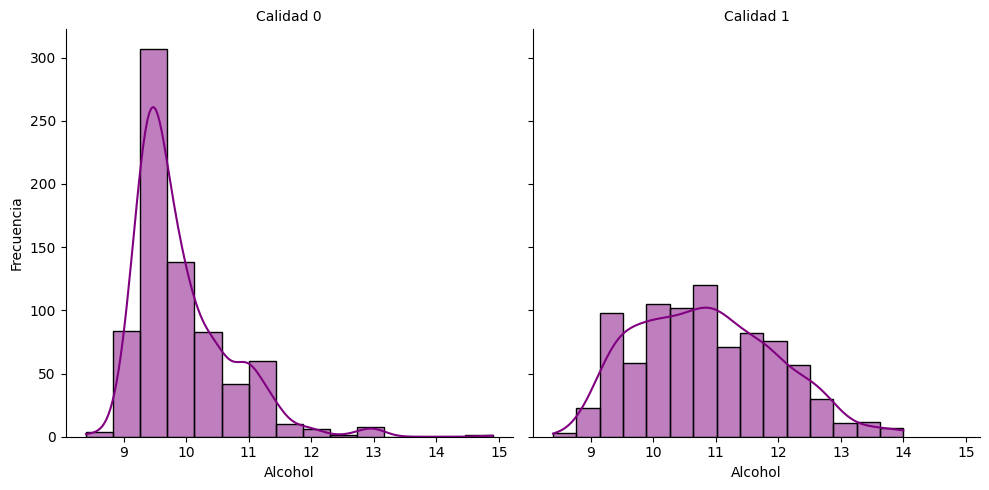

In [38]:
g = sns.FacetGrid(data=datos, col="calidad", col_wrap=2, height=5, sharex=True, sharey=True)
g.map(sns.histplot, "alcohol", bins=15, color="purple", kde=True)

g.set_axis_labels("Alcohol", "Frecuencia")
g.set_titles("Calidad {col_name}")
plt.show()

## Gráfico de violín

In [41]:
datos['cuartiles_fixed_acidity'] = pd.qcut(datos['fixed acidity'], q=4, labels=['q1', 'q2', 'q3', 'q4'])

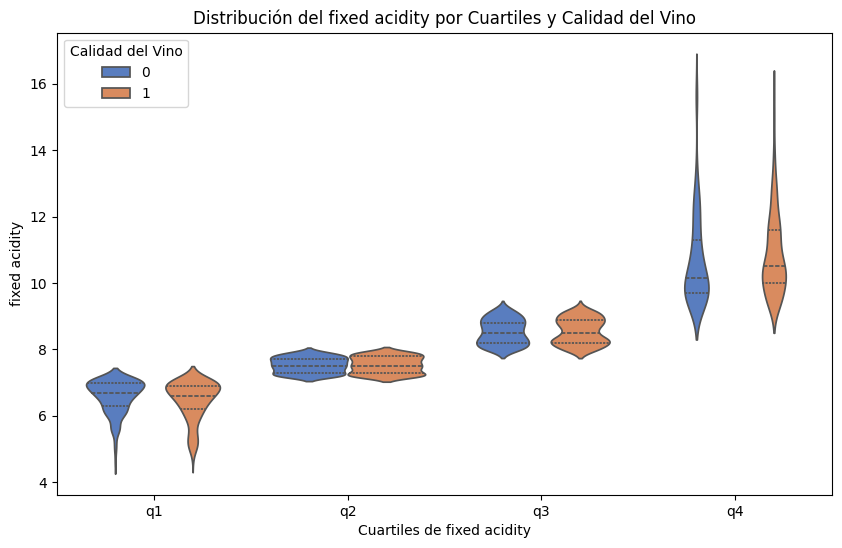

In [44]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='cuartiles_fixed_acidity', y='fixed acidity', hue='calidad', data=datos, inner='quartile', palette='muted')

# Ajustes finales
plt.xlabel("Cuartiles de fixed acidity")
plt.ylabel("fixed acidity")
plt.title("Distribución del fixed acidity por Cuartiles y Calidad del Vino")
plt.legend(title="Calidad del Vino")
plt.show()

# Segunda Parte

In [58]:
import wikipedia
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

page = wikipedia.page("Mistborn", auto_suggest=False)
content = page.content
content

'Mistborn is a series of epic fantasy novels written by American author Brandon Sanderson and published by Tor Books. The first trilogy, published between 2006 and 2008, consists of The Final Empire, The Well of Ascension, and The Hero of Ages. A second series was released between 2011 and 2022, and consists of the quartet The Alloy of Law, Shadows of Self, The Bands of Mourning and The Lost Metal. Sanderson also released a novella in 2016, Mistborn: Secret History. Sanderson plans to write a third and fourth series.\nThe first Mistborn trilogy chronicles the efforts of a secret group of Allomancers who attempt to overthrow a dystopian empire and establish themselves in a world covered by ash. The first trilogy was a huge success. This success pushed Sanderson to further develop his fictional universe, the Cosmere, which also includes The Stormlight Archive. Set about 300 years after the ending of the first trilogy, the second series is about the exploits of a character forced to move 

## Rectangular

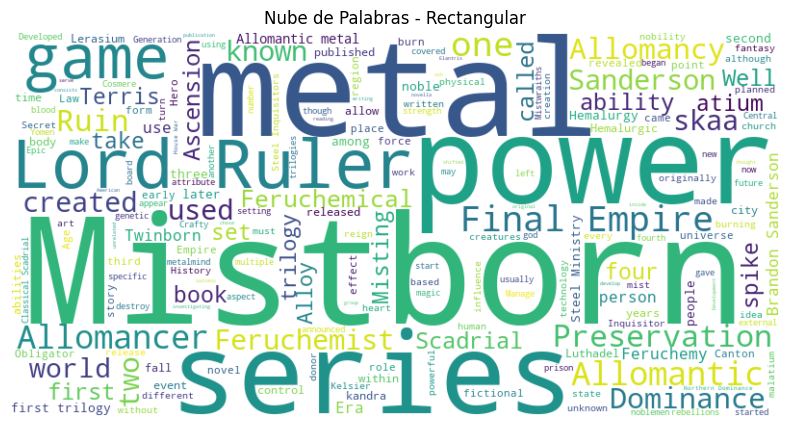

In [59]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords, background_color="white").generate(content)

# Paso 3: Mostrar la nube de palabras rectangular
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras - Rectangular")
plt.show()

## Con Máscara

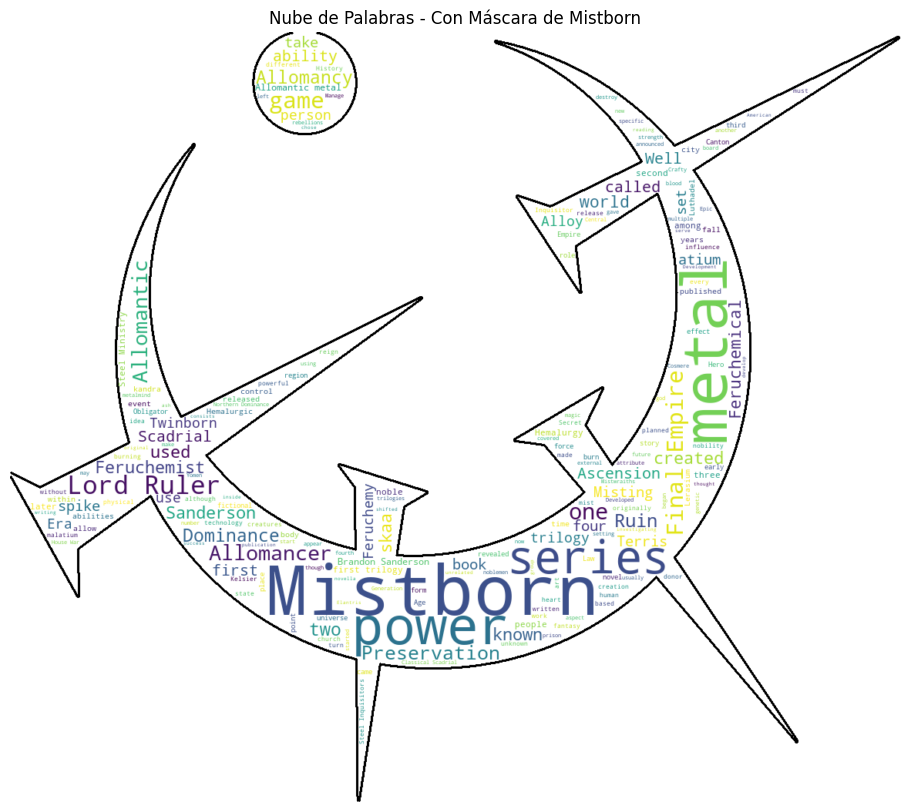

In [ ]:

mask = np.array(Image.open("imagen_mistborn.png"))

wordcloud_masked = WordCloud(width=800, height=400, stopwords=stopwords, background_color="white", mask=mask, contour_width=2, contour_color="black").generate(content)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud_masked, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras - Con Máscara de Mistborn")
plt.show()